In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

In [3]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self, title = None):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()

        if title is not None:
            plt.title(label= title)
        
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})



In [4]:
import random
import math
from random import randint,uniform

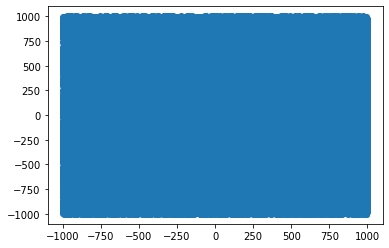

In [5]:
%matplotlib inline

# zbiór a

cords = (-1000, 1000)
a = [(uniform(cords[0], cords[1]), uniform(cords[0], cords[1])) for _ in range(10**5)]
Plot([PointsCollection(a)]).draw()

with open("a.txt", "w") as fp:
    js.dump(a, fp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

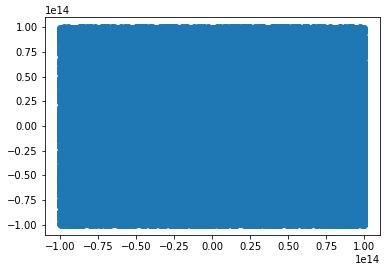

In [6]:
%matplotlib ipympl

# zbiór b

cords = (-10 ** 14, 10 ** 14)

b = [(randint(cords[0], cords[1]), randint(cords[0], cords[1])) for _ in range(10**5)]
Plot([PointsCollection(b)]).draw()

with open("b.txt", "w") as fp:
    js.dump(b, fp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

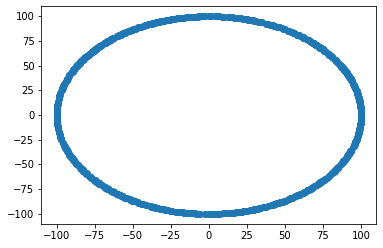

In [7]:
%matplotlib ipympl

# zbior c okrag
n = 1000
r = 100
c = [None] * n
p = (0.0, 0.0)
for i in range(n):
    d = random.random() * (2*math.pi)
    c[i] = (p[0] + r*math.sin(d), p[1] + r*math.cos(d))

Plot([PointsCollection(c)]).draw()

with open("c.txt", "w") as fp:
    js.dump(c, fp)

In [8]:
%matplotlib ipympl

# zbior d prosta

n = 1000

p1 = (-1.0, 0.0)
p2 = (1.0, 0.1)

lineA = (p1[1] - p2[1]) / (p1[0] - p2[0])
lineB = p1[1] - lineA * p1[0]

d = [None] * n
for i in range(n):
    x = randint(-1000,1000)
    d[i] = (x, lineA*x + lineB)

Plot([PointsCollection(d)]).draw()

with open("d.txt", "w") as fp:
    js.dump(d, fp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
def load():
    with open("a.txt", "r") as fp:
        a = js.load(fp)

    with open("b.txt", "r") as fp:
        b = js.load(fp)

    with open("c.txt", "r") as fp:
        c = js.load(fp)

    with open("d.txt", "r") as fp:
        d = js.load(fp)

    return a, b, c, d
a,b,c,d = load()


In [10]:
def det3x3(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - c[0]*b[1] - a[1]*b[0] - a[0]*c[1]

In [11]:
def det2x2(a,b,c):
    return (a[0] - c[0])*(b[1] - c[1]) - (a[1] - c[1])*(b[0] - c[0])

In [12]:
def detNp3x3(a,b,c):
    arr = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    return np.linalg.det(arr)


In [13]:
def detNp2x2(a,b,c):
    arr = np.array([[a[0] - c[0], a[1] - c[1]], [b[0] - c[0], b[1] - c[1]]])
    return np.linalg.det(arr)

In [14]:
def classify(points, detFun, e = 10** -14, a = (-1.0,0.0), b = (1.0,0.1)):
    left = []
    right = []
    collinear = []

    for p in points:
        d = detFun(a,b,p)

        if d > e:
            left.append(p)
        elif d < -e:
            right.append(p)
        else:
            collinear.append(p)
 
    return left, collinear, right

In [15]:
def plotClassification(points, detFun, e = 10**-14, a = (-1.0,0.0), b = (1.0,0.1)):
    
    left, collinear, right = classify(points, detFun, e, a, b)

    
    classified = [PointsCollection(left, color='blue'),
                  PointsCollection(right, color='green'),
                  PointsCollection(collinear, color= 'pink')]

    
    Plot(classified).draw()

    print("Left: ", len(left))
    print("Right: ",len(right))
    print("Collinear: ",len(collinear))


In [16]:
def countDiff(points, detFun1, detFun2, e = 10**-14, a = (-1.0,0.0), b = (1.0,0.1)):
    #czerwone to punkty sklasyfikowane przez detFun1 jako wspolliniowe, a detFun2 nie
    #zielone to punkyu sklasyfikowane przez detFun2 jako wpolliniowe, a detFun1 nie
    def cat(p, f):
        d = f(a,b,p)

        if d > e:
            return 'l'
        elif d < -e:
            return 'r'
        else:
            return 'c'
    res1 = []
    res2 = []        
    for p in points:
        if cat(p,detFun1) is not cat(p,detFun2):
            if cat(p, detFun1) is not 'c':
                res2.append(p)
            else:
                res1.append(p)
            

            
    %matplotlib ipympl
    Plot([PointsCollection(res1, color= 'red'),PointsCollection(res2, color='green')]).draw()

    print ("Difference:",len(res1)+len(res2))




<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-16-217cd477e8e0>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if cat(p, detFun1) is not 'c':


In [17]:
epsilon = 10**-14

In [18]:
%matplotlib ipympl

plotClassification(a,det2x2,e = epsilon)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Left:  49800
Right:  50200
Collinear:  0


In [19]:
%matplotlib ipympl
plotClassification(a,det3x3,e= epsilon)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Left:  49800
Right:  50200
Collinear:  0


In [20]:
countDiff(a,det2x2,det3x3, e=epsilon)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Difference: 0


In [101]:
%matplotlib ipympl

plotClassification(a,det2x2,e = epsilon)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Left:  49839
Right:  50161
Collinear:  0


In [100]:
%matplotlib ipympl
plotClassification(a,det3x3,e= epsilon)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Left:  49839
Right:  50161
Collinear:  0


In [99]:
countDiff(a,det2x2,det3x3, e=epsilon)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Difference: 0
